In [1]:
import tensorflow as tf
from tensorflow import keras
print("Number of GPUS : ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()

Number of GPUS :  1


True

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from PIL import Image
from tqdm import tqdm

In [3]:
import glob
import cv2

In [4]:
def fun(var):
    var = var[16:]
    var = var.split(" ")
    var[1] = var[1][:1]
    var[0] = int(var[0])
    var[1] = int(var[1])
    return var[1]

In [4]:

x_train = []
y_train = []
x_test = []
y_test = []
# val=[]


for images in tqdm(glob.iglob(f'trainingdata/*')):
    print(images)
    break
    label = fun(images)
    x_train.append(cv2.imread(images, 0))
    y_train.append(label)

0it [00:00, ?it/s]

trainingdata\normal


In [7]:
print(plt.imshow(x_train[0]))

IndexError: list index out of range

In [5]:
vgg = VGG16(input_shape=[224, 224] + [3], weights='imagenet', include_top=False)

In [6]:
for layer in vgg.layers:
    layer.trainable = False

In [7]:
x = Flatten()(vgg.output)

In [11]:
folders = glob.glob('../over/*')

In [12]:
print(len(folders))

2


In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
optimizer = keras.optimizers.Adam(lr=0.000001)

c:\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizer,
  metrics=['accuracy']
)

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
train_path = '../over'
test_path = '../dataset/chest_xray/test'

In [18]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7750 images belonging to 2 classes.


In [19]:
training_set.class_indices

{'normal': 0, 'pneumonia': 1}

In [20]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [21]:
r = model.fit(training_set,validation_data=test_set,epochs=100,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/100
243/243 [==============================] - 239s 932ms/step - loss: 0.9384 - accuracy: 0.5001 - val_loss: 0.9077 - val_accuracy: 0.3750
Epoch 2/100
243/243 [==============================] - 143s 589ms/step - loss: 0.6852 - accuracy: 0.5535 - val_loss: 0.6968 - val_accuracy: 0.4904
Epoch 3/100
243/243 [==============================] - 139s 570ms/step - loss: 0.6155 - accuracy: 0.7172 - val_loss: 0.6302 - val_accuracy: 0.6715
Epoch 4/100
243/243 [==============================] - 112s 460ms/step - loss: 0.5726 - accuracy: 0.8090 - val_loss: 0.5922 - val_accuracy: 0.7372
Epoch 5/100
243/243 [==============================] - 313s 1s/step - loss: 0.5354 - accuracy: 0.8559 - val_loss: 0.5655 - val_accuracy: 0.7596
Epoch 6/100
243/243 [==============================] - 322s 1s/step - loss: 0.5036 - accuracy: 0.8721 - val_loss: 0.5405 - val_accuracy: 0.7917
Epoch 7/100
243/243 [==============================] - 139s 569ms/step - loss: 0.4742 - accuracy: 0.8885 - val_loss: 0.5190 

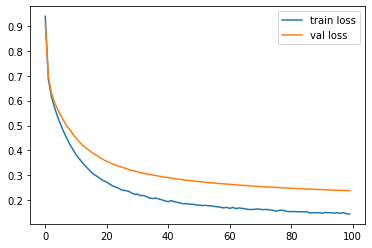

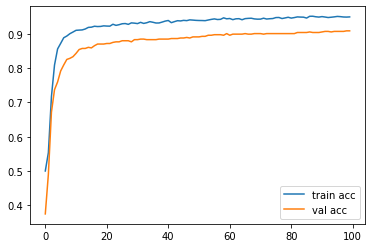

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']